<br>

<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: blue; background-color: #ffffff;">PERSONALIZED ROUTES: Geographical Network Analysis</h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">NOTEBOOK for SECTION 2.3 </h5>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">AUTHOR: Luis Rodríguez Ballabriga</h5>


<br>

---

<br>




<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#vector_data">1&nbsp;&nbsp;&nbsp;&nbsp;VECTOR DATA AND SHAPEFILES</a></h3>

---

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#shapefiles">1.1&nbsp;&nbsp;&nbsp;&nbsp;Shapefiles</a></h3>


---

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#spatial_graphs">1.2&nbsp;&nbsp;&nbsp;&nbsp;Spatial Graphs</a></h3>


---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#shortest_path">2&nbsp;&nbsp;&nbsp;&nbsp;SHORTEST PATH</a></h3>

---

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: blue;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---

In [1]:
#ENV SET UP
import warnings
warnings.filterwarnings("ignore")

from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import pandas as pd

import geopandas as gpd
import networkx as nx
import osmnx as ox

from shapely.geometry import LineString, Point

print(f'– PANDAS VERSION: {pd.__version__}')
print(f'– GEOPANDAS VERSION: {gpd.__version__}')
print(f'– NETWORKX VERSION: {nx.__version__}')
print(f'– OSMNX VERSION: {ox.__version__}')

– PANDAS VERSION: 1.3.3
– GEOPANDAS VERSION: 0.10.2
– NETWORKX VERSION: 2.6.3
– OSMNX VERSION: 1.1.2


<br>

<a id="vector_data"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;" id="vector_data">1&nbsp;&nbsp;VECTOR DATA AND SHAPEFILES&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---

<a id="shapefiles"></a>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: blue; background-color: #ffffff;" id="shapefiles">1.1 SHAPEFILES</h3>



We can see that in the folder Shapefiles folder there are many different files.

In [2]:
listdir('./Shapefiles/')

['BCN_GrafVial_Nodes_ED50_SHP.dbf',
 'BCN_GrafVial_Trams_ED50_SHP.prj',
 'BCN_GrafVial_Nodes_ED50_SHP.shp',
 'BCN_GrafVial_Nodes_ED50_SHP.shx',
 'BCN_GrafVial_Trams_ED50_SHP.dbf',
 'BCN_GrafVial_Trams_ED50_SHP.shp',
 'BCN_GrafVial_Nodes_ED50_SHP.prj',
 'BCN_GrafVial_Trams_ED50_SHP.shx']

We have two different groups, with the same name but with different extensions. As explained in the report, all the files of a same-named group conform the shapefile format. 

Reading only the .shp we obtain the whole picture.

In [3]:
nodes_shp = gpd.read_file('./Shapefiles/BCN_GrafVial_Nodes_ED50_SHP.shp', encoding='utf-8')
edges_shp = gpd.read_file('./Shapefiles/BCN_GrafVial_Trams_ED50_SHP.shp', encoding='utf-8')

Let's see how the datasets look like. We also will make a quick plot of both of them.

In [4]:
nodes_shp.head(3)

,C_Nus,Coord_X,Coord_Y,geometry
0,N00001D,432202.434,4581246.437,POINT (432202.434 4581246.437)
1,N00002E,432243.589,4581257.498,POINT (432243.589 4581257.498)
2,N00003F,432257.945,4581261.119,POINT (432257.945 4581261.119)


Here we can see that this file contains the city nodes. That is why the last of the fields, *geometry*, contains **POINT** type objects.

In [5]:
nodes_shp.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
9453    Point
9454    Point
9455    Point
9456    Point
9457    Point
Length: 9458, dtype: object

In [6]:
nodes_shp.shape

(9458, 4)

<AxesSubplot:>

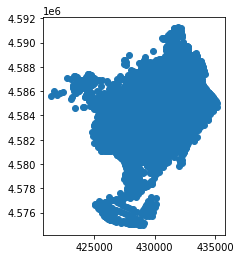

In [7]:
nodes_shp.plot()

In [8]:
pd.set_option('display.max_columns',None)
edges_shp.head(3)

,COORD_X,COORD_Y,LONGITUD,C_Tram,C_Nus_I,C_Nus_F,Distric_D,NDistric_D,Illa_D,CCarr_D,NCarr_D,NPost_I_D,NPost_F_D,Tram_Dret,Distric_E,NDistric_E,Illa_E,CCarr_E,NCarr_E,NPost_I_E,NPost_F_E,Tram_Esq,geometry
0,432223.0115,4.581252e+06,42.615487,T00001B,N00001D,N00002E,01,Ciutat Vella,10390,010900,Carrer Almirall Cervera,2,2,2,01,Ciutat Vella,10410,010900,Carrer Almirall Cervera,1,1,1,"LINESTRING (432202.434 4581246.437, 432243.589..."
1,432250.7670,4.581259e+06,14.805620,T00002C,N00002E,N00003F,01,Ciutat Vella,10371,010900,Carrer Almirall Cervera,4,6,4 <=> 6,01,Ciutat Vella,10421,010900,Carrer Almirall Cervera,3,5,3 <=> 5,"LINESTRING (432243.589 4581257.498, 432257.945..."
2,432265.2895,4.581264e+06,15.480301,T00003D,N00003F,N00004G,01,Ciutat Vella,10371,010900,Carrer Almirall Cervera,4,6,4 <=> 6,01,Ciutat Vella,10421,010900,Carrer Almirall Cervera,3,5,3 <=> 5,"LINESTRING (432257.945 4581261.119, 432272.634..."


The other group of files corresponds to the edges that join the previous nodes, that is, the different streets or segments of these that make up the city. The LINESTRING object type is used for this purpose.

In [9]:
edges_shp.geom_type

0        LineString
1        LineString
2        LineString
3        LineString
4        LineString
            ...    
13955    LineString
13956    LineString
13957    LineString
13958    LineString
13959    LineString
Length: 13960, dtype: object

In [10]:
edges_shp.shape

(13960, 23)

<AxesSubplot:>

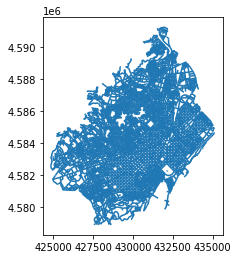

In [11]:
edges_shp.plot()

So, we can see we have a total of 9458 nodes and 13960 edges joinning these nodes. We can also observe how the dataset of the axes contains more features, which refer to aspects of the location, such as the districts, the street or the section to which it corresponds.

Let us now make a more complete graph by combining the two datasets and some of the features we have available.

For example, using the different districts of the city. In it we will be painting in grey all the nodes and in the "Set2" *cmap* the edges correspoding to the different neighborhoods.

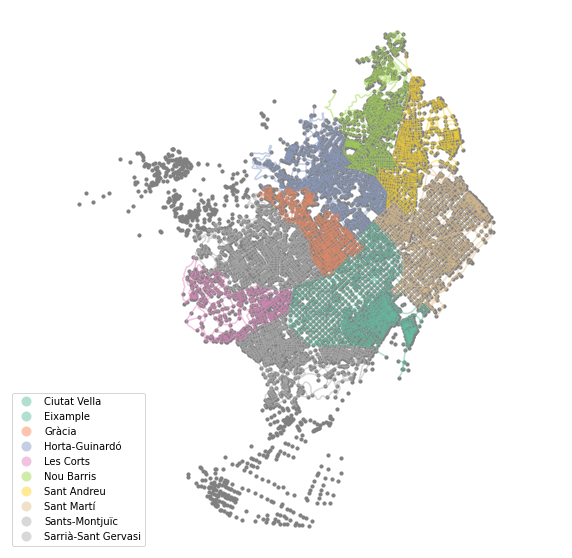

In [12]:
fig, ax = plt.subplots(figsize = (10, 10))

edges_shp.plot(column= 'NDistric_D', ax = ax, alpha=.5, legend=True, cmap = "Set2")
nodes_shp.plot(ax=ax, categorical=True, marker='.', legend=False, markersize=40, color = 'grey')

ax.set_axis_off()
plt.axis('equal')
plt.show()

Now we can check some attributes and metadata that is informed in the .prj file, as for example the Coordinate Reference System (CRS) of the data.

In [13]:
nodes_shp.crs

<Projected CRS: EPSG:23031>
Name: ED50 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - between 0°E and 6°E - Andorra; Denmark (North Sea); Germany offshore; Netherlands offshore; Norway including Svalbard - onshore and offshore; Spain - onshore (mainland and Balearic Islands); United Kingdom (UKCS) offshore.
- bounds: (0.0, 38.56, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Datum 1950
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [14]:
edges_shp.crs

<Projected CRS: EPSG:23031>
Name: ED50 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - between 0°E and 6°E - Andorra; Denmark (North Sea); Germany offshore; Netherlands offshore; Norway including Svalbard - onshore and offshore; Spain - onshore (mainland and Balearic Islands); United Kingdom (UKCS) offshore.
- bounds: (0.0, 38.56, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Datum 1950
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

<a id="spatial_graphs"></a>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: blue; background-color: #ffffff;" id="spatial_graphs">1.2 SPATIAL GRAPHS</h3>


The **OSMNX** package discussed in the report makes it easy to retrieve routable networks from OpenStreetMap with different modes of transport (walking, cycling and driving). Thus obtaining a graph file that allows to combine some functionalities of the **NETWORKX** module to make easier the routing along the OpenStreetMap data.

Let's download the information for walkable routes for the city of the Barcelona.

In [22]:
place_name = "Barcelona"

graph_bcn = ox.graph_from_place(place_name, network_type='walk')

In [23]:
type(graph_bcn)

networkx.classes.multidigraph.MultiDiGraph

The obtained object is a MultiDiGraph, which is the common one when dealing with graphs in networkx.

As we can see, this process is somewhat lengthy and requires an internet connection in order to be executed. That is why we can save this file and retrieve it immediately whenever we need it.

In [24]:
nx.write_gpickle(graph_bcn, "./Graphs/barcelona.gpickle")

In [18]:
graph_bcn_loaded = nx.read_gpickle("./Graphs/barcelona.gpickle")

We can now plot the graph.

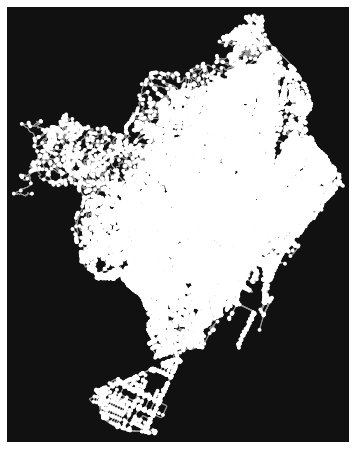

In [19]:
fig, ax = ox.plot_graph(graph_bcn)

Let's take a look to the attributes of this graph. For it we will convert it to a GeoDataframe and check the columns.

In [20]:
edges = ox.graph_to_gdfs(graph_bcn, nodes=False, edges=True)

edges.columns

Index(['osmid', 'lanes', 'name', 'highway', 'maxspeed', 'oneway', 'length',
       'geometry', 'service', 'access', 'tunnel', 'ref', 'width', 'junction',
       'est_width', 'bridge', 'area'],
      dtype='object')

We can also check some stats about the graph we are going to use.

In [21]:
stats = ox.basic_stats(graph_bcn)

print(stats)

{'n': 69124, 'm': 222694, 'k_avg': 6.443319252358081, 'edge_length_total': 7883903.435999905, 'edge_length_avg': 35.40240615373519, 'streets_per_node_avg': 3.2278079972223828, 'streets_per_node_counts': {0: 0, 1: 4201, 2: 2, 3: 41165, 4: 23415, 5: 292, 6: 45, 7: 3, 8: 1}, 'streets_per_node_proportions': {0: 0.0, 1: 0.060774839419015105, 2: 2.8933510792199525e-05, 3: 0.5955239858804467, 4: 0.3387390775996759, 5: 0.004224292575661131, 6: 0.0006510039928244893, 7: 4.3400266188299285e-05, 8: 1.4466755396099762e-05}, 'intersection_count': 64923, 'street_length_total': 3941951.718000009, 'street_segment_count': 111347, 'street_length_avg': 35.402406153735704, 'circuity_avg': 1.0500773551769595, 'self_loop_proportion': 0.0006915318778233809}


<br>

<a id="shortest_path"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: blue; background-color: #ffffff;" id="shortest_path">2&nbsp;&nbsp;SHORTEST PATH&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---


Let’s now calculate the shortest path between two points.

First, let's check what is the format of the data.

In [22]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can see it is in *WGS 84* format. So we need to reproject our data into metric system so that our map looks better and is stadarized with the dataset that we will be using.

Luckily there is a handy function in osmnx called project_graph() to project the graph data in *UTM* format.

In [23]:
graph_bcn_prj = ox.project_graph(graph_bcn)

Let's plot it to see if it has changed something visually.

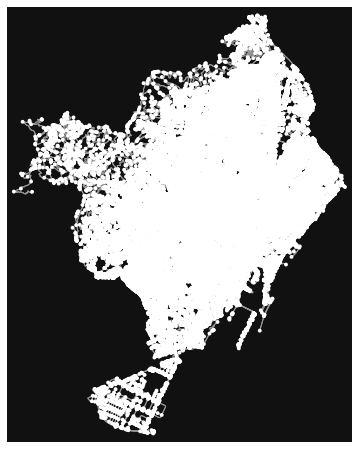

In [24]:
fig, ax = ox.plot_graph(graph_bcn_prj)

We can now obtain the edges and the nodes of this graph, in order to have them in two different datasets.

In [25]:
nodes_bcn_prj, edges_bcn_prj = ox.graph_to_gdfs(graph_bcn_prj, nodes=True, edges=True)

In [26]:
nodes_bcn_prj = nodes_bcn_prj.round(decimals=6)

To find a path we need to specify the source and target locations for our route. We will be using the next ones:
* Source: **Faculty of Physics and Chemistry of the University of Barcelona**
* Target: **Faculty of Mathematics and Computer Science**

Checking on Google Maps we can obtain the coordinates of this places:
* Source: x = 2.116779 ; y = 41.385327
* Target: x = 2.164115 ; y = 41.386310 

So, we define the two points.

In [27]:
source_aux = nodes_bcn_prj.query('lon == 2.116778 & lat == 41.385310')

In [28]:
source_point = source_aux.geometry.values[0]

In [29]:
target_aux = nodes_bcn_prj.query('lon == 2.164115  & lat == 41.386310')

In [30]:
target_point = target_aux.geometry.values[0]

Let’s now find the nearest graph nodes (and their node-ids, called osmids) to these points. For *OSMNX* we need to parse the coordinates of the Point as coordinate-tuple with Latitude (**y**), Longitude (**x**) coordinates.

As our data is now projected to *UTM* projection, we need to specify with method parameter that the function uses ‘euclidean’ distances to calculate the distance from the point to the closest node. This becomes to know the actual distance between the Point and the closest node.

In [31]:
source_xy = (source_point.y, source_point.x)
target_xy = (target_point.y, target_point.x)

source_node = ox.get_nearest_node(graph_bcn_prj, source_xy, method='euclidean')
target_node = ox.get_nearest_node(graph_bcn_prj, target_xy, method='euclidean')

s_closest = nodes_bcn_prj.loc[source_node]
t_closest = nodes_bcn_prj.loc[target_node]

Now we have all our data prepared for generating the route between our source and our target location. We are going to use the *shortest_path* function from the *networkX* library. In it we wil be specifying the *lenght* attributem that should be used as the cost impedance in the routing.

In [32]:
route = nx.shortest_path(G=graph_bcn_prj, source=source_node, target=target_node, weight='length')

As a result we get a list of all the nodes that are along the shortest path. We could extract the locations of those nodes from the nodes_proj GeoDataFrame and create a LineString presentation of the points, but luckily, *OSMNX* can do that for us and we can plot shortest path by using plot_graph_route() function.

In [33]:
print(route)

[7234707898, 7234707906, 8512174175, 7159551275, 7159551277, 7234707917, 9545433003, 3394169508, 3394169500, 3394169527, 3394169528, 3394169563, 3394169544, 7234707920, 3394169564, 6096421452, 5678325108, 6374595639, 390227080, 356295267, 6374595635, 765796225, 1375306778, 6248912569, 6248912564, 6248912562, 2126571874, 2087204995, 7252348289, 269384759, 1483923435, 7252669473, 7252397729, 269384878, 7252397728, 8126690996, 269383989, 7252397720, 3191418776, 7252397718, 7252397709, 269379908, 7252397699, 6210812030, 998637904, 269379907, 8197555116, 30558433, 8121946706, 8121946705, 364991353, 3237622868, 9135827929, 9135827928, 1382873567, 8121946700, 8197555138, 8197555125, 6889577892, 6889577894, 2643498765, 2643498764, 5808643406, 5808643410, 1589583456, 5808643405, 5808643416, 5808643390, 5808643413, 5808558189, 5808557738, 9576130236, 9576130240, 5808557749, 1589583445, 5808558186, 7198688932, 6984788044, 6984788043, 6916899264, 6984788042, 6984788036, 6916899266, 6984788037, 698

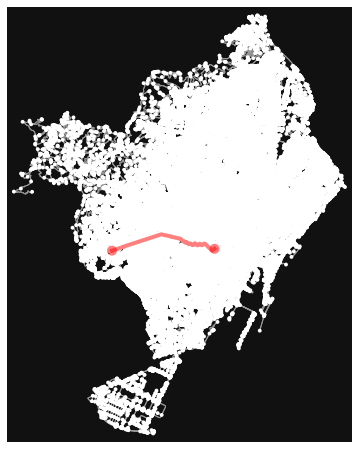

In [34]:
fig, ax = ox.plot_graph_route(graph_bcn_prj, route)

As we can see, the resulting plot is not the best one. In order to improve it and to be able to easily see the different buildings through which we have to pass and where we have to turn, we are going to make a more accurate representation.

We generate a dataset with all the nodes of the route.

In [35]:
route_nodes = nodes_bcn_prj.loc[route]

print(route_nodes)

                       y              x  street_count       lon        lat  \
osmid                                                                        
7234707898  4.581908e+06  426153.570959             3  2.116778  41.385310   
7234707906  4.581924e+06  426203.352586             3  2.117372  41.385458   
8512174175  4.581939e+06  426250.004346             3  2.117928  41.385596   
7159551275  4.581943e+06  426260.899280             5  2.118057  41.385633   
7159551277  4.581946e+06  426266.532266             3  2.118124  41.385661   
...                  ...            ...           ...       ...        ...   
5167682775  4.581920e+06  430022.776667             3  2.163048  41.385766   
2989750377  4.581916e+06  430027.017528             4  2.163100  41.385729   
3314271770  4.581978e+06  430092.462439             4  2.163875  41.386294   
3314271771  4.581969e+06  430101.225992             4  2.163981  41.386209   
26057307    4.581980e+06  430112.555020             4  2.164115 

We prepare one dataframe for our source and target points.

In [36]:
st_points = gpd.GeoDataFrame(crs=edges_bcn_prj.crs)

st_points['geometry'] = None

st_points['type'] = None
st_points.loc[0, ['geometry', 'type']] = source_point, 'Origin'
st_points.loc[1, ['geometry', 'type']] = target_point, 'Target'
st_points.head()

,geometry,type
0,POINT (426153.571 4581907.927),Origin
1,POINT (430112.555 4581979.665),Target


We create a GeoDataframe with some useful information about our route such as a list of the osmids and the lenght of the route.

In [37]:
route_line = LineString(list(route_nodes.geometry.values))

route_geom = gpd.GeoDataFrame(crs=edges_bcn_prj.crs)

route_geom['geometry'] = None
route_geom['osmids'] = None

route_geom.loc[0, 'geometry'] = route_line
route_geom.loc[0, 'osmids'] = str(list(route_nodes.index.values)) #Getting OSMID values
route_geom['length_m'] = route_geom.length

In [38]:
buildings = ox.geometries_from_place(place_name, tags = {'building': True})
buildings_prj = buildings.to_crs(crs=edges_bcn_prj.crs)

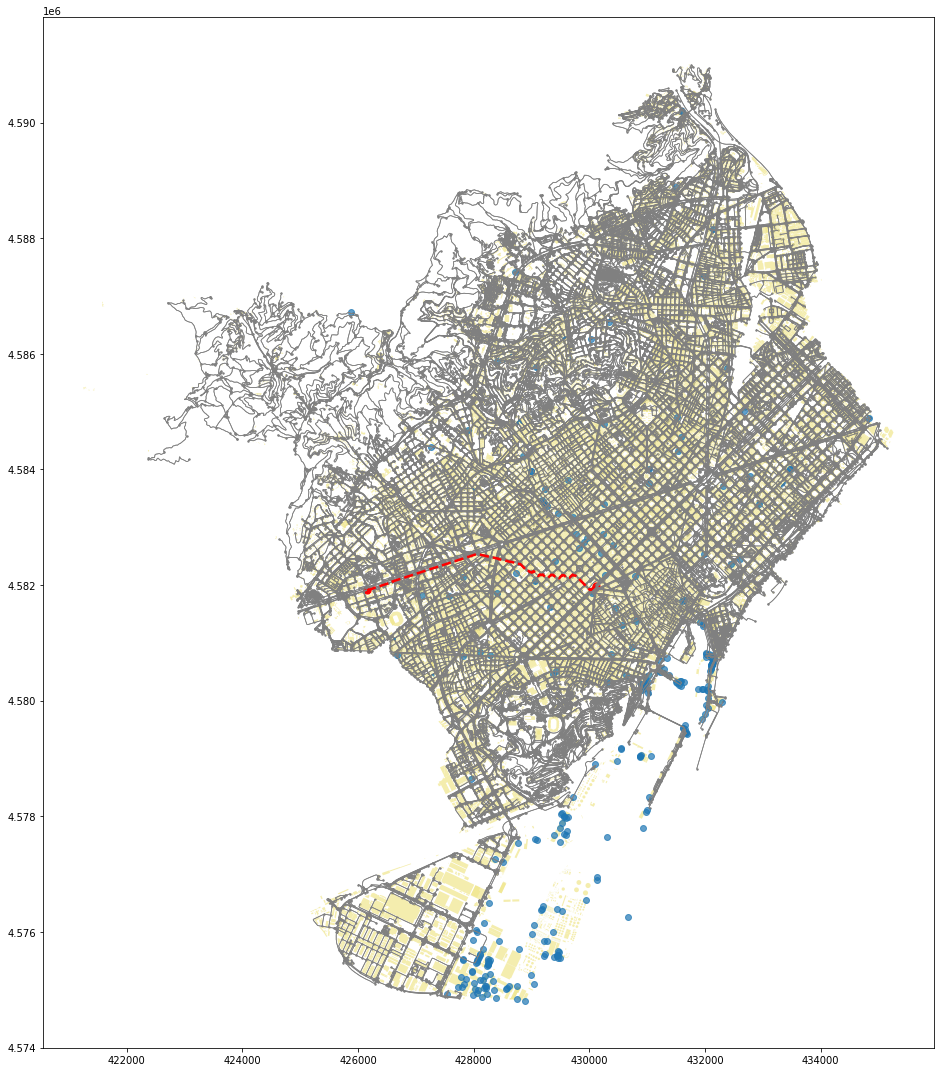

In [39]:
fig, ax = plt.subplots(figsize=(15,15))

nodes_bcn_prj.plot(ax=ax, markersize=2, color='gray')
edges_bcn_prj.plot(ax=ax, linewidth=0.75, color='gray')
buildings_prj.plot(ax=ax, facecolor='khaki', alpha=0.7)
route_geom.plot(ax=ax, linewidth=2.5, linestyle='--', color='red')
st_points.plot(ax=ax, markersize=50, color='red')

plt.tight_layout()

With this final (and more clear) graphic we end the code regarding the chapter 2.3 of the report.